# Wczytywanie danych

In [1]:
# Read csv file

import numpy as np
import pandas as pd
import sklearn as sk

file_data = pd.read_csv('credit_data.csv')

# Drops unnecessary first column containing original row numbers
credit_data = file_data.drop('Unnamed: 0', axis=1)

In [2]:
# Shows first five rows of data from file
credit_data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


# Procesowanie danych

In [3]:
# One hot and dummy encoding

def one_hot(df, nan = False):
    original = list(df.columns)
    category = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns = category, dummy_na = nan, drop_first = True)
    new_columns = [c for c in df.columns if c not in original]
    return df, new_columns

In [4]:
credit_data['Saving accounts'] = credit_data['Saving accounts'].fillna('no_data')
credit_data['Checking account'] = credit_data['Checking account'].fillna('no_data')

In [5]:
credit_data = credit_data.merge(pd.get_dummies(credit_data['Purpose'], drop_first=True, prefix='Purpose'), left_index=True, right_index=True)
credit_data = credit_data.merge(pd.get_dummies(credit_data['Sex'], drop_first=True, prefix='Sex'), left_index=True, right_index=True)
credit_data = credit_data.merge(pd.get_dummies(credit_data['Housing'], drop_first=True, prefix='Housing'), left_index=True, right_index=True)
credit_data = credit_data.merge(pd.get_dummies(credit_data["Saving accounts"], drop_first=True, prefix='Savings'), left_index=True, right_index=True)
credit_data = credit_data.merge(pd.get_dummies(credit_data.Risk, prefix='Risk'), left_index=True, right_index=True)
credit_data = credit_data.merge(pd.get_dummies(credit_data["Checking account"], drop_first=True, prefix='Checking'), left_index=True, right_index=True)

credit_data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,...,Housing_rent,Savings_moderate,Savings_no_data,Savings_quite rich,Savings_rich,Risk_bad,Risk_good,Checking_moderate,Checking_no_data,Checking_rich
0,67,male,2,own,no_data,little,1169,6,radio/TV,good,...,0,0,1,0,0,0,1,0,0,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,...,0,0,0,0,0,1,0,1,0,0
2,49,male,1,own,little,no_data,2096,12,education,good,...,0,0,0,0,0,0,1,0,1,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,...,0,0,0,0,0,0,1,0,0,0
4,53,male,2,free,little,little,4870,24,car,bad,...,0,0,0,0,0,1,0,0,0,0


In [6]:
# Delete these data columns for models and use certain one-hot values instead

del credit_data["Saving accounts"]
del credit_data["Checking account"]
del credit_data["Purpose"]
del credit_data["Sex"]
del credit_data["Housing"]
del credit_data["Risk"]
del credit_data['Risk_good']

In [7]:
# Scale credit amount by natural log function to smaller values

credit_data['Credit amount'] = np.log(credit_data['Credit amount'])
credit_data.head()

,Age,Job,Credit amount,Duration,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,...,Housing_own,Housing_rent,Savings_moderate,Savings_no_data,Savings_quite rich,Savings_rich,Risk_bad,Checking_moderate,Checking_no_data,Checking_rich
0,67,2,7.063904,6,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
1,22,2,8.691315,48,0,0,0,0,1,0,...,1,0,0,0,0,0,1,1,0,0
2,49,1,7.647786,12,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,45,2,8.972337,42,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,53,2,8.490849,24,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# Dzielenie na zbiory

In [8]:
# Define X and y variables, use bad risk examples as y

X = credit_data.drop('Risk_bad', axis = 1).values
y = credit_data["Risk_bad"].values

# Podział na zbiory uczące oraz testowe

In [9]:
from sklearn.model_selection import train_test_split

# 80-20 data split between training and testing, set randomness
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
seed = 5

# Etap uczenia

In [10]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

svc = SVC() # dla obiczonego class weight 60.5% 
svc.fit(X_train, y_train)

SVC()

In [11]:
y_predicted = svc.predict(X_test)

# Metryki

In [12]:
svc_score = svc.score(X_test, y_test)
print("SVC Classifier Accuracy Score: {:.2f}%".format(svc_score*100))

SVC Classifier Accuracy Score: 70.50%


Macierz konfuzji:

<AxesSubplot:>

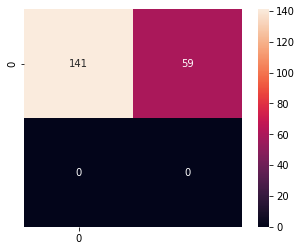

In [13]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_predicted, y_test)
values = np.unique(y_predicted)

sns.heatmap(matrix, square=True, annot=True, fmt='d', cbar='False', xticklabels=values, yticklabels=values)

In [14]:
print('Raport klasyfikacji SVC: ')
print(classification_report(y_test, y_predicted))

Raport klasyfikacji SVC: 
              precision    recall  f1-score   support

           0       0.70      1.00      0.83       141
           1       0.00      0.00      0.00        59

    accuracy                           0.70       200
   macro avg       0.35      0.50      0.41       200
weighted avg       0.50      0.70      0.58       200



c:\users\mbagnsk\desktop\pendrive\studiapendrive\magisterka1\iims\aum\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\mbagnsk\desktop\pendrive\studiapendrive\magisterka1\iims\aum\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\mbagnsk\desktop\pendrive\studiapendrive\magisterka1\iims\aum\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter t

# Polepszanie modelu

In [15]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights

array([0.71556351, 1.65975104])

In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1], 
              'gamma': [0.01, 0.001], 
              'kernel': ['rbf', 'poly', 'sigmoid']
              'class_weight' : {}
             } 

svc_grid = SVC()
clf = GridSearchCV(svc_grid, param_grid, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

# Best paramete set
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'C': 0.1, 'gamma': 0.01, 'kernel': 'poly'}


In [21]:
# grid search
svc_grid = SVC(**clf.best_params_);
svc_grid.fit(X_train, y_train)

y_grid_predicted = svc_grid.predict(X_test)

In [29]:
# grid seach + class weight
svc_grid_class = SVC(**clf.best_params_, class_weight= {0: 0.71556351, 1: 1.65975104})
svc_grid_class.fit(X_train, y_train)

y_grid_class_predicted = svc_grid_class.predict(X_test)

# Zestawienie wyników uzyskanych dla wszystkich modeli

In [30]:
svc_score = svc.score(X_test, y_test)
print("SVC Classifier Accuracy Score: {:.2f}%".format(svc_score*100))

svc_grid_score = svc_grid.score(X_test, y_test)
print("SVC(+ grid search) Classifier Accuracy Score: {:.2f}%".format(svc_grid_score*100))

svc_grid_class_score = svc_grid_class.score(X_test, y_test)
print("SVC(+ grid search + class weight) Classifier Accuracy Score: {:.2f}%".format(svc_grid_class_score*100))

SVC Classifier Accuracy Score: 70.50%
SVC(+ grid search) Classifier Accuracy Score: 76.50%
SVC(+ grid search + class weight) Classifier Accuracy Score: 67.00%


Macierze konfuzji:

<AxesSubplot:>

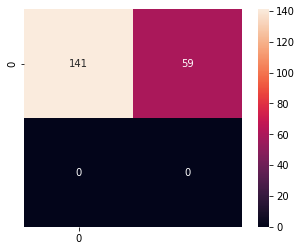

In [31]:
matrix = confusion_matrix(y_predicted, y_test)
values = np.unique(y_predicted)

sns.heatmap(matrix, square=True, annot=True, fmt='d', cbar='False', xticklabels=values, yticklabels=values)

<AxesSubplot:>

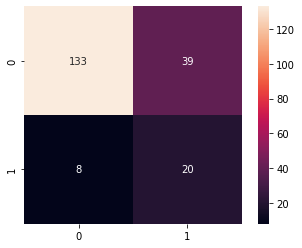

In [32]:
matrix = confusion_matrix(y_grid_predicted, y_test)
values = np.unique(y_grid_predicted)

sns.heatmap(matrix, square=True, annot=True, fmt='d', cbar='False', xticklabels=values, yticklabels=values)

<AxesSubplot:>

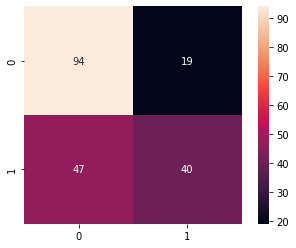

In [33]:
matrix = confusion_matrix(y_grid_class_predicted, y_test)
values = np.unique(y_grid_class_predicted)

sns.heatmap(matrix, square=True, annot=True, fmt='d', cbar='False', xticklabels=values, yticklabels=values)

Raport klasyfikacji:

In [34]:
from sklearn.metrics import classification_report

print('SVC:')
print(classification_report(y_test, y_predicted))

print('SVC + GridSearch: ')
print(classification_report(y_test, y_grid_predicted))

print('SVC + GridSearch + class_weight')
print(classification_report(y_test, y_grid_class_predicted))

SVC:
              precision    recall  f1-score   support

           0       0.70      1.00      0.83       141
           1       0.00      0.00      0.00        59

    accuracy                           0.70       200
   macro avg       0.35      0.50      0.41       200
weighted avg       0.50      0.70      0.58       200

SVC + GridSearch: 
              precision    recall  f1-score   support

           0       0.77      0.94      0.85       141
           1       0.71      0.34      0.46        59

    accuracy                           0.77       200
   macro avg       0.74      0.64      0.65       200
weighted avg       0.76      0.77      0.73       200

SVC + GridSearch + class_weight
              precision    recall  f1-score   support

           0       0.83      0.67      0.74       141
           1       0.46      0.68      0.55        59

    accuracy                           0.67       200
   macro avg       0.65      0.67      0.64       200
weighted avg      

c:\users\mbagnsk\desktop\pendrive\studiapendrive\magisterka1\iims\aum\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\mbagnsk\desktop\pendrive\studiapendrive\magisterka1\iims\aum\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\mbagnsk\desktop\pendrive\studiapendrive\magisterka1\iims\aum\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter t

# Wizualizacja procesu uczenia

In [35]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

import numpy as np
from matplotlib import pyplot as plt

In [36]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

<module 'matplotlib.pyplot' from 'c:\\users\\mbagnsk\\desktop\\pendrive\\studiapendrive\\magisterka1\\iims\\aum\\lib\\site-packages\\matplotlib\\pyplot.py'>

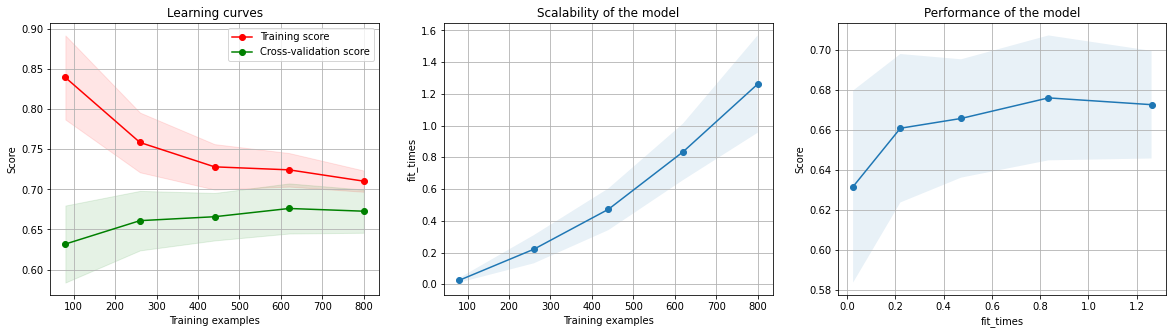

In [38]:
cv = ShuffleSplit(n_splits = 50, test_size = 0.2, random_state = 0)
plot_learning_curve(svc_grid_class, 'Learning curves', X, y, axes=None, cv=cv, n_jobs=6)